# Big Mac Data Omega
## Your Task
Now it's time to put it all together and complete an activity which demonstrates what you've learned so far. You may use several code windows if this helps.

1) **Read** in the *big_mac_source_data_v2.csv* file and store it in a dataframe.

2) **Remove** the *iso_a3*, *GDP_dollar* and *GDP_local* columns.

3) **Remove** all rows **except** for *Australia*, *Britan*, *France*, *New Zealand* and *United States*. Hint: [Drop All Rows Except](https://www.statology.org/pandas-drop-all-rows-except/).

4) **Create** a new column which calculates the **US dollar price** by multipling *local_price* by *dollar_ex* [How to mulitply two columns in Pandas](https://www.statology.org/pandas-multiply-two-columns/). If you get a warning due to setting a value on copy of a slice, use: 

    `name_of_your_dataframe.loc[:, 'yournewcolumnname'] = ...` 

5) **Calculate** the **mean** for each country in USD. You may need to first isolate each country [Select rows from Dataframe based on Column Values](https://sentry.io/answers/select-rows-from-a-python-pandas-dataframe-based-on-column-values/)

6) Use **matplotlib** to plot a **comparison** of each country's average - look at [matplotlib Bars](https://www.w3schools.com/python/matplotlib_bars.asp)

7) Do step 4 and 5 again for **median**.

8) **Extension:** See if you can simplify step 5-7 into the minimum amount of code possible (use *for loops* and *functions* where possible)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

big_mac_df = pd.read_csv('data/big_mac_source_data_v2.csv')
big_mac_df.head()

big_mac_df.drop(columns=['iso_a3', 'GDP_dollar', 'GDP_local'], inplace=True)

big_mac_df



,name,currency_code,local_price,dollar_ex,date
0,Argentina,ARS,2.50,1.00000,2000-04-01
1,Australia,AUD,2.59,1.68000,2000-04-01
2,Brazil,BRL,2.95,1.79000,2000-04-01
3,Canada,CAD,2.85,1.47000,2000-04-01
4,Switzerland,CHF,5.90,1.70000,2000-04-01
...,...,...,...,...,...
2083,Ukraine,UAH,105.00,36.93145,2023-07-01
2084,Uruguay,UYU,259.00,37.76500,2023-07-01
2085,United States,USD,5.58,1.00000,2023-07-01
2086,Vietnam,VND,74000.00,23687.50000,2023-07-01


In [3]:
big_mac_df = big_mac_df.query("name == 'Australia' | name == 'Britain' | name == 'France' | name == 'New Zealand' | name == 'United States'")
big_mac_df

,name,currency_code,local_price,dollar_ex,date
1,Australia,AUD,2.59,1.680000,2000-04-01
10,Britain,GBP,1.90,0.632911,2000-04-01
19,New Zealand,NZD,3.40,2.010000,2000-04-01
26,United States,USD,2.24,1.000000,2000-04-01
29,Australia,AUD,3.00,1.980000,2001-04-01
...,...,...,...,...,...
2019,Australia,AUD,7.45,1.484010,2023-07-01
2039,France,EUR,5.30,0.906990,2023-07-01
2040,Britain,GBP,4.19,0.777210,2023-07-01
2066,New Zealand,NZD,8.10,1.606813,2023-07-01


In [4]:
big_mac_df.loc[:, 'USD'] = big_mac_df['local_price'] * big_mac_df['dollar_ex']
big_mac_df




C:\Users\sscott102\AppData\Local\Temp\ipykernel_19032\3678470629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_mac_df.loc[:, 'USD'] = big_mac_df['local_price'] * big_mac_df['dollar_ex']


,name,currency_code,local_price,dollar_ex,date,USD
1,Australia,AUD,2.59,1.680000,2000-04-01,4.351200
10,Britain,GBP,1.90,0.632911,2000-04-01,1.202532
19,New Zealand,NZD,3.40,2.010000,2000-04-01,6.834000
26,United States,USD,2.24,1.000000,2000-04-01,2.240000
29,Australia,AUD,3.00,1.980000,2001-04-01,5.940000
...,...,...,...,...,...,...
2019,Australia,AUD,7.45,1.484010,2023-07-01,11.055873
2039,France,EUR,5.30,0.906990,2023-07-01,4.807047
2040,Britain,GBP,4.19,0.777210,2023-07-01,3.256510
2066,New Zealand,NZD,8.10,1.606813,2023-07-01,13.015184


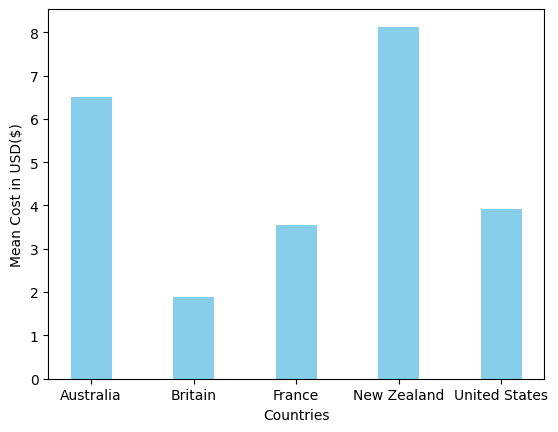

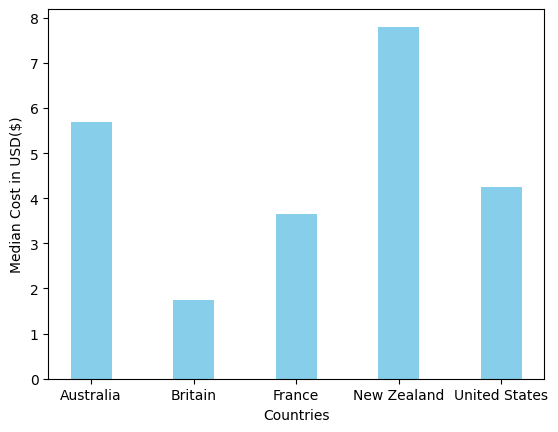

In [6]:
def bar_graphs(my_list, big_type):
    plt.bar(countries, my_list, color='skyblue', width = 0.4)
    plt.xlabel('Countries')
    plt.ylabel(f'{big_type} Cost in USD($)')
    plt.show()

countries = ['Australia', 'Britain', 'France', 'New Zealand', 'United States']
means = []
medians = []

for country in countries:
    big_country = big_mac_df.loc[big_mac_df['name'] == country]
    big_mean = big_country['USD'].mean()
    means.append(big_mean)
    big_median = big_country['USD'].median()
    medians.append(big_median)

bar_graphs(means, 'Mean')
bar_graphs(medians, 'Median')



    